In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker

In [2]:
df = pd.read_csv('output.csv',delimiter=',')

In [3]:
df = df.replace(',','', regex=True)
df['% Gain'] = df['% Gain'].replace('%','', regex=True)
df['Avg % Gain'] = df['Avg % Gain'].replace('%','', regex=True)
df['% Gain'] = df['% Gain'].replace(' ','', regex=True)
df = df.astype({'% Gain': 'float64','Avg % Gain': 'float64','Peak': 'int','Average':'int','Gain':'int64'})

In [8]:
df.head(5)

,Month,Peak,Gain,% Gain,Average,Avg % Gain
0,August 2024,1426478,78976,5.9,897247,2.6
1,July 2024,1347502,-178394,-11.7,874848,-7.5
2,June 2024,1525896,-10572,-6.5,945732,-1.2
3,May 2024,1631616,12931,0.8,956998,2.7
4,April 2024,1618685,93616,6.1,931411,4.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       152 non-null    object 
 1   Peak        152 non-null    int64  
 2   Gain        152 non-null    int64  
 3   % Gain      152 non-null    float64
 4   Average     152 non-null    int64  
 5   Avg % Gain  152 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 7.3+ KB


In [155]:
df.head()

,Month,Peak,Gain,% Gain,Average,Avg % Gain,Date,Quarter
0,August 2024,1426478,78976,5.9,897247,2.6,2024-08-01,2024Q3
1,July 2024,1347502,-178394,-11.7,874848,-7.5,2024-07-01,2024Q3
2,June 2024,1525896,-10572,-6.5,945732,-1.2,2024-06-01,2024Q2
3,May 2024,1631616,12931,0.8,956998,2.7,2024-05-01,2024Q2
4,April 2024,1618685,93616,6.1,931411,4.6,2024-04-01,2024Q2


In [153]:
df.describe()

,Peak,Gain,% Gain,Average,Avg % Gain,Date
count,1.520000e+02,152.000000,152.000000,1.520000e+02,152.000000,152
mean,6.461240e+05,4714.519737,24.026316,1.130223e+05,0.326316,2018-04-16 07:25:15.789473792
min,2.040000e+02,-444602.000000,-70.000000,0.000000e+00,-18.900000,2011-11-01 00:00:00
25%,1.017912e+05,-23141.500000,-5.800000,0.000000e+00,0.000000,2015-02-22 00:00:00
50%,6.534155e+05,3694.500000,2.350000,0.000000e+00,0.000000,2018-04-16 00:00:00
75%,9.927932e+05,35748.750000,11.550000,0.000000e+00,0.000000,2021-06-08 12:00:00
max,1.818773e+06,304363.000000,2567.100000,1.116430e+06,21.400000,2024-08-01 00:00:00
std,4.793945e+05,83393.366533,212.855191,2.909109e+05,3.748231,NaN


In [15]:

quarterly_data2.head()

,Quarter,% Gain
0,2011Q4,0.0
1,2012Q1,519.1
2,2012Q2,50.4
3,2012Q3,2567.1
4,2012Q4,137.3


In [14]:
quarterly_data.head()

,Quarter,Peak
0,2011Q4,680
1,2012Q1,1263
2,2012Q2,2919
3,2012Q3,52596
4,2012Q4,50533


In [10]:
df['Date'] = pd.to_datetime(df['Month'], format='%B %Y')
df['Quarter'] = df['Date'].dt.to_period('Q')

quarterly_data = df.groupby('Quarter').agg({'Peak': 'max'}).reset_index()
quarterly_data2 = df.groupby('Quarter').agg({'% Gain': 'max'}).reset_index()

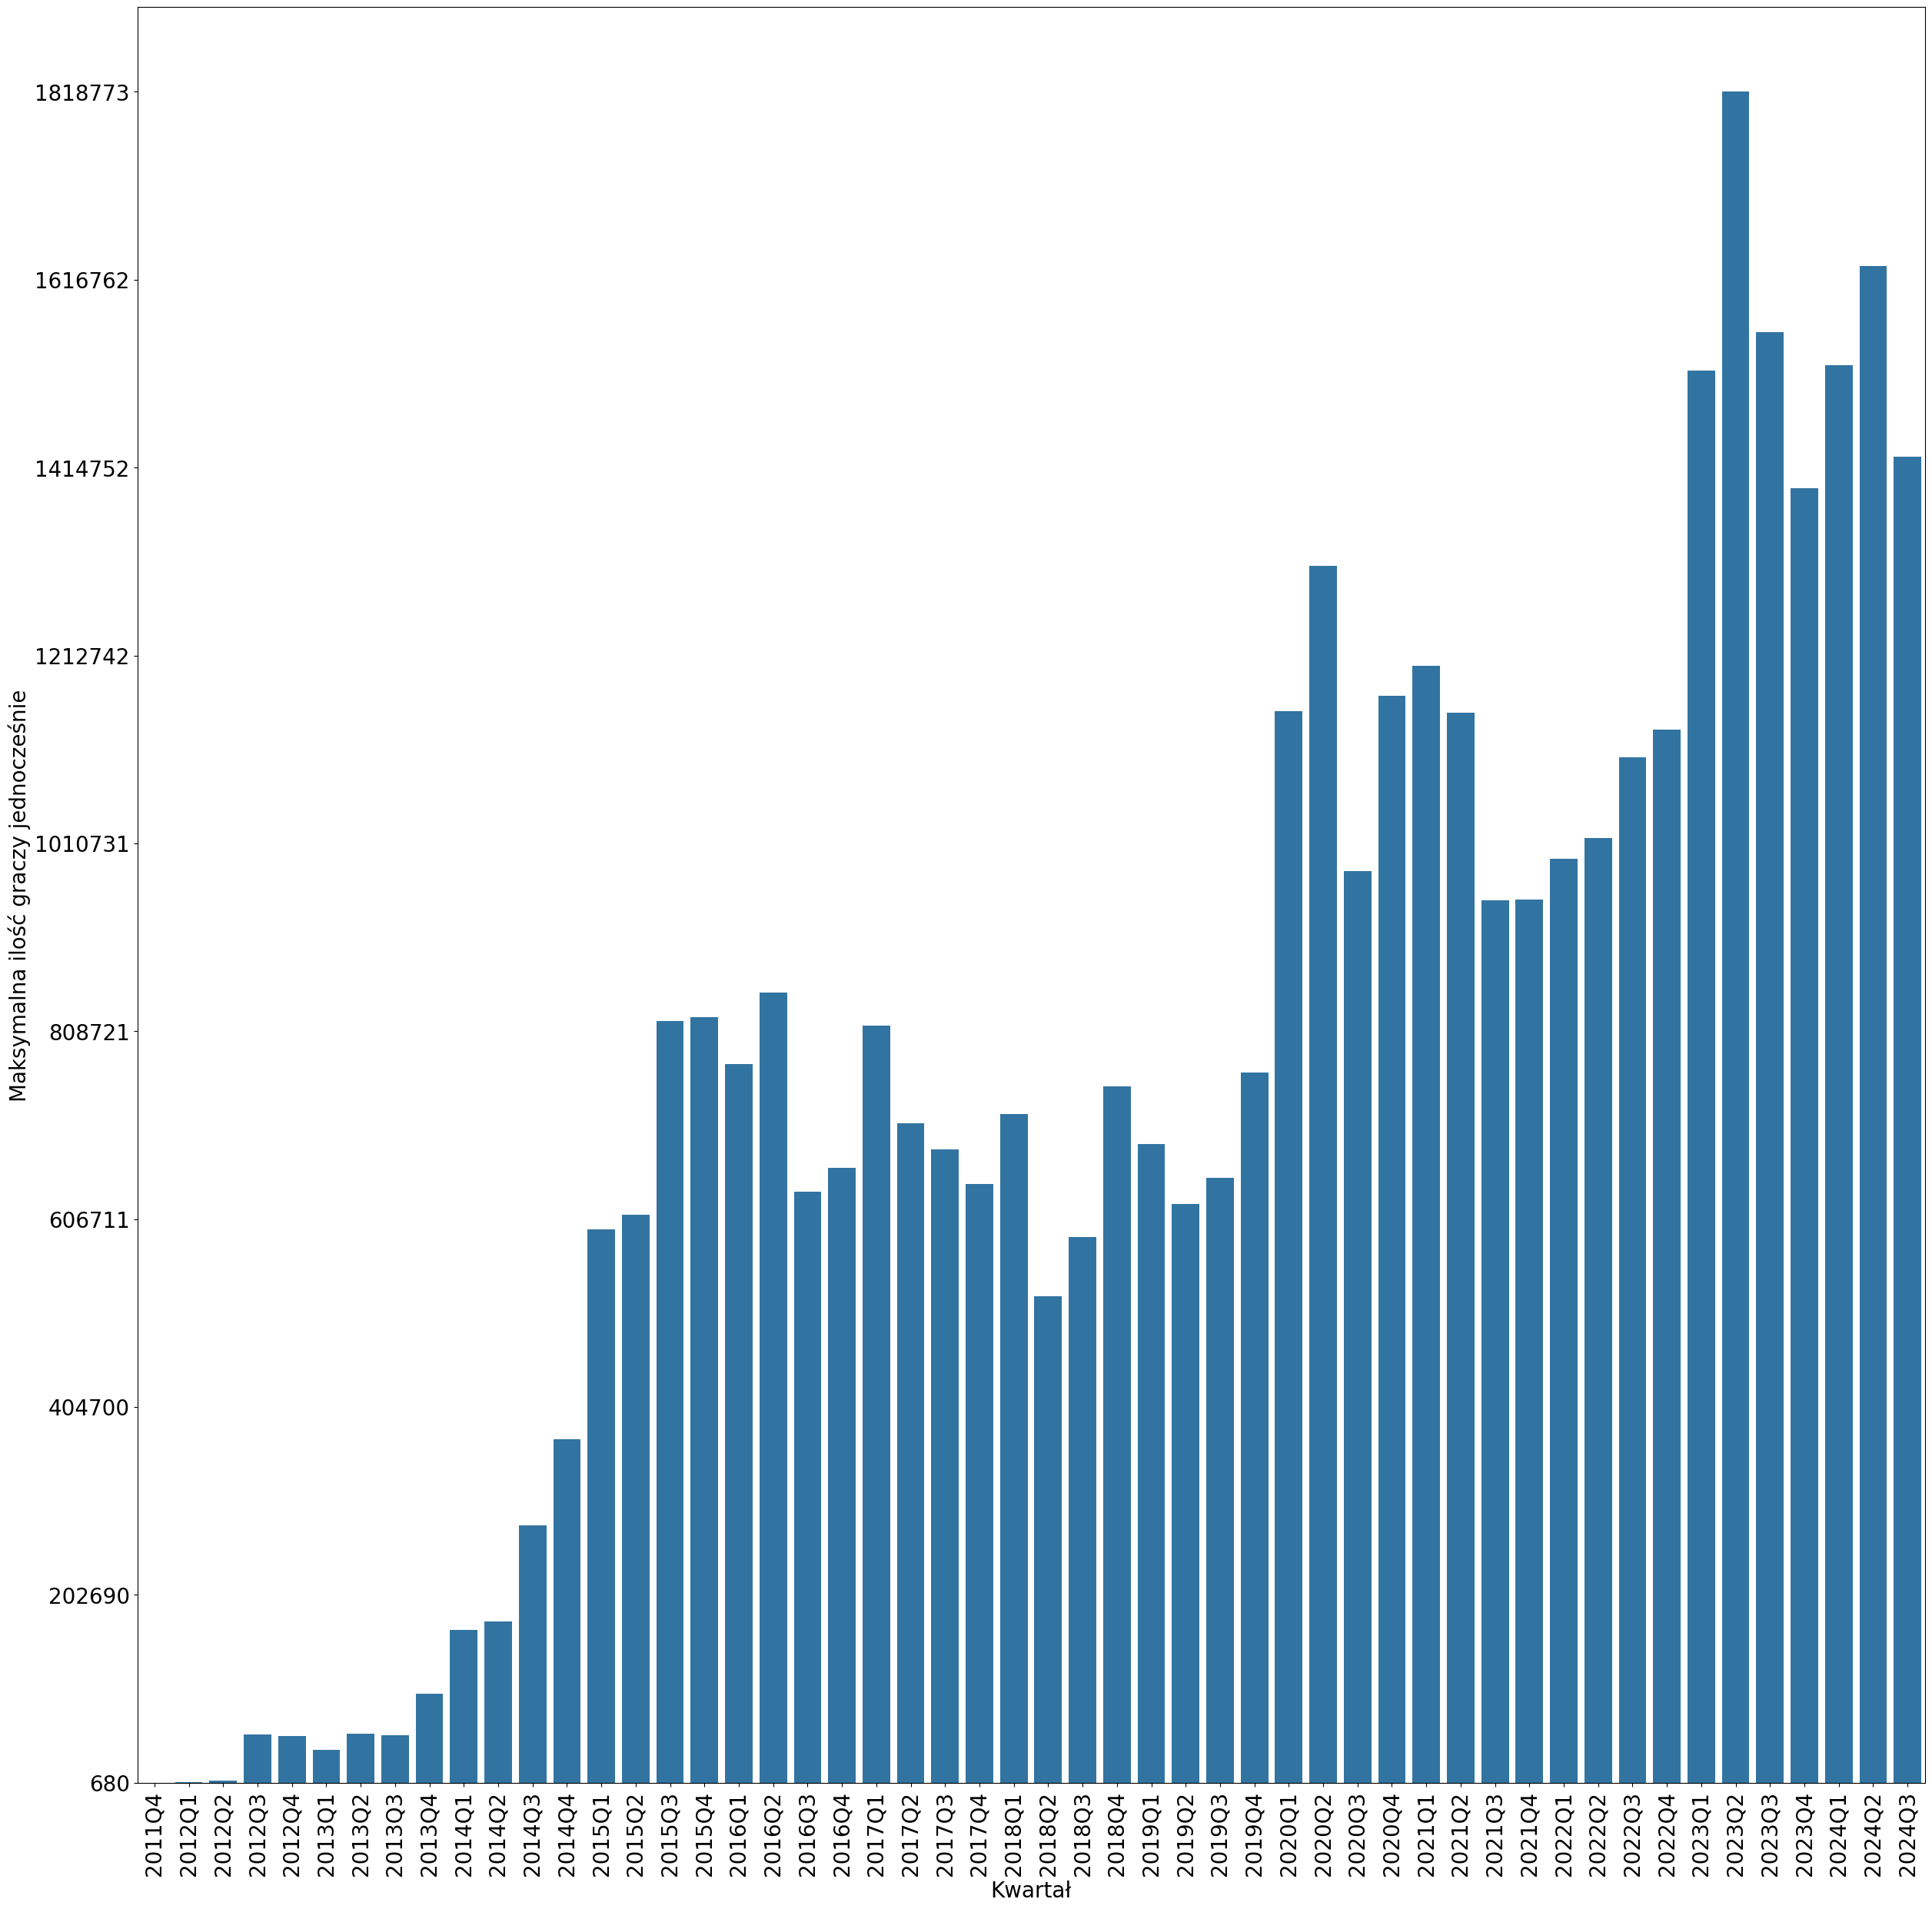

In [11]:
plt.figure(figsize=(30,30))
plt.xlabel('Kwartał', fontsize=20)  
plt.ylabel('Maksymalna ilość graczy jednocześnie', fontsize=20) 
sns.barplot(x='Quarter', y='Peak', data=quarterly_data)
y_min = quarterly_data['Peak'].min()
y_max = quarterly_data['Peak'].max()
yticks = np.linspace(y_min, y_max, 10)
plt.yticks(yticks)
plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), '')))
plt.xticks(rotation=90, fontsize=20)  
plt.yticks(fontsize=20)  #
plt.show()



In [220]:
quarterly_data

,Quarter,Peak
0,2011Q4,680
1,2012Q1,1263
2,2012Q2,2919
3,2012Q3,52596
4,2012Q4,50533
5,2013Q1,35597
6,2013Q2,53381
7,2013Q3,52052
8,2013Q4,96673
9,2014Q1,164781


In [169]:
quarterly_data2

,Quarter,% Gain
0,2011Q4,0.0
1,2012Q1,519.1
2,2012Q2,50.4
3,2012Q3,2567.1
4,2012Q4,137.3
5,2013Q1,13.5
6,2013Q2,66.0
7,2013Q3,22.6
8,2013Q4,76.3
9,2014Q1,37.6


In [195]:
quarterly_data2 = quarterly_data2.rename(columns={'% Gain': 'Percent_Gain'})


In [196]:
quarterly_data2

,Quarter,Percent_Gain
0,2011Q4,0.0
1,2012Q1,519.1
2,2012Q2,50.4
3,2012Q3,2567.1
4,2012Q4,137.3
5,2013Q1,13.5
6,2013Q2,66.0
7,2013Q3,22.6
8,2013Q4,76.3
9,2014Q1,37.6


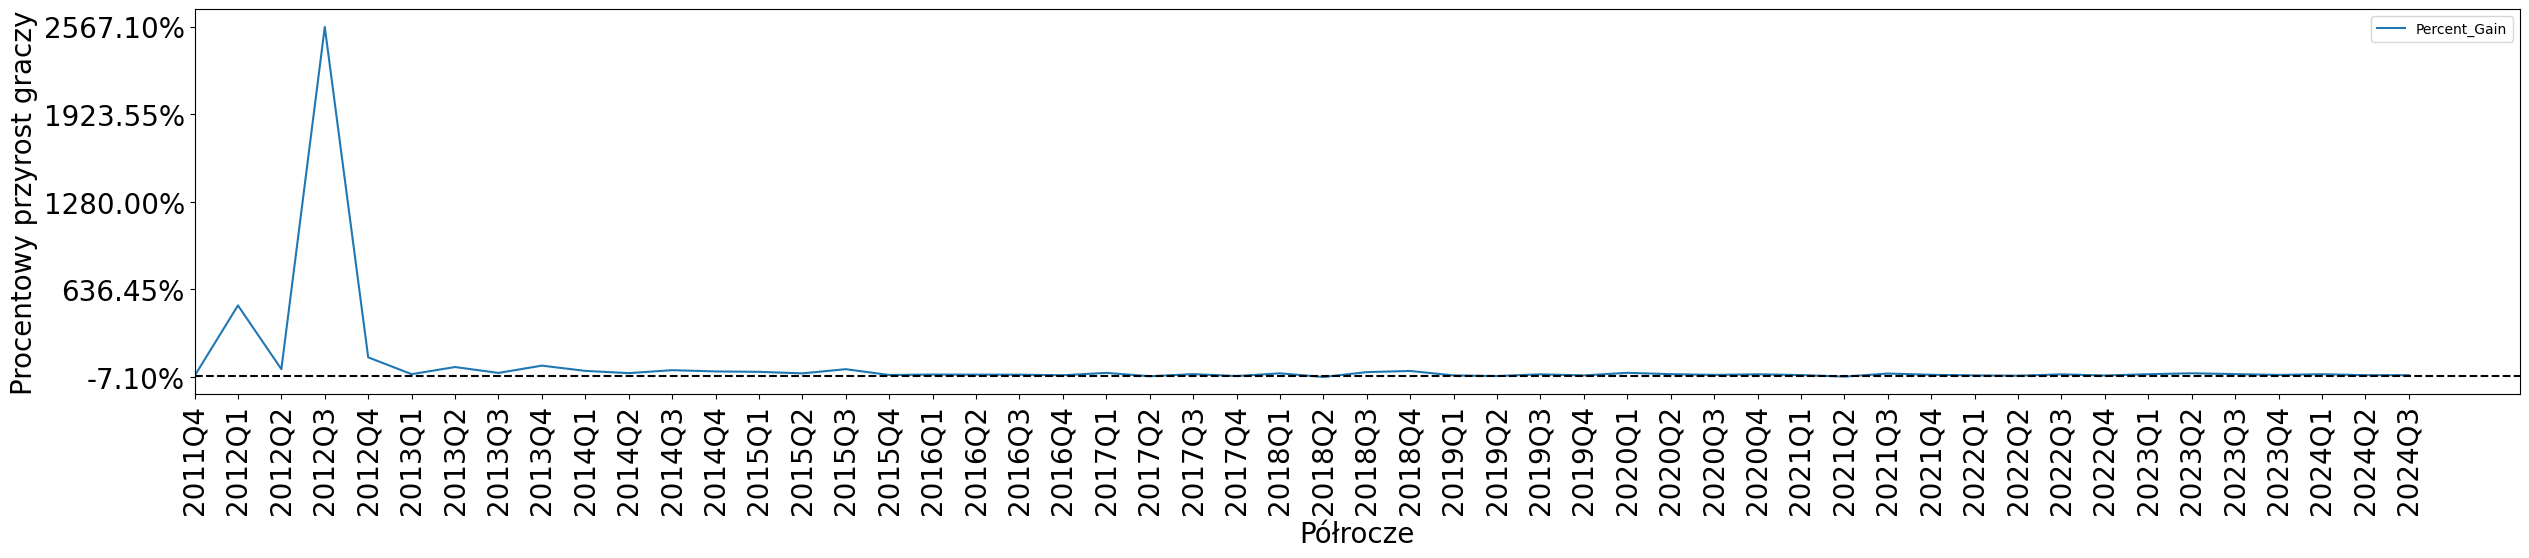

In [244]:
plt.figure(figsize=(30,5))
plt.xlabel('Półrocze', fontsize=20) 
plt.ylabel('Procentowy przyrost graczy', fontsize=20)  
sns.lineplot( data=quarterly_data2)
y_min = quarterly_data2['Percent_Gain'].min()
y_max = quarterly_data2['Percent_Gain'].max()
yticks = np.linspace(y_min, y_max, 5)
plt.yticks(yticks)

plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(x, '.2f') + '%'))
plt.xticks(rotation=90, fontsize=20)  
plt.xticks(np.arange(len(quarterly_data2)), quarterly_data2['Quarter'], rotation=90)
plt.yticks(fontsize=20) 

plt.xlim(left=0)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.show()


In [243]:
quarterly_data2['Percent_Gain'].median()

np.float64(13.1)

In [255]:
quarterly_data3 =quarterly_data2[quarterly_data2['Quarter'] >= '2012Q4']

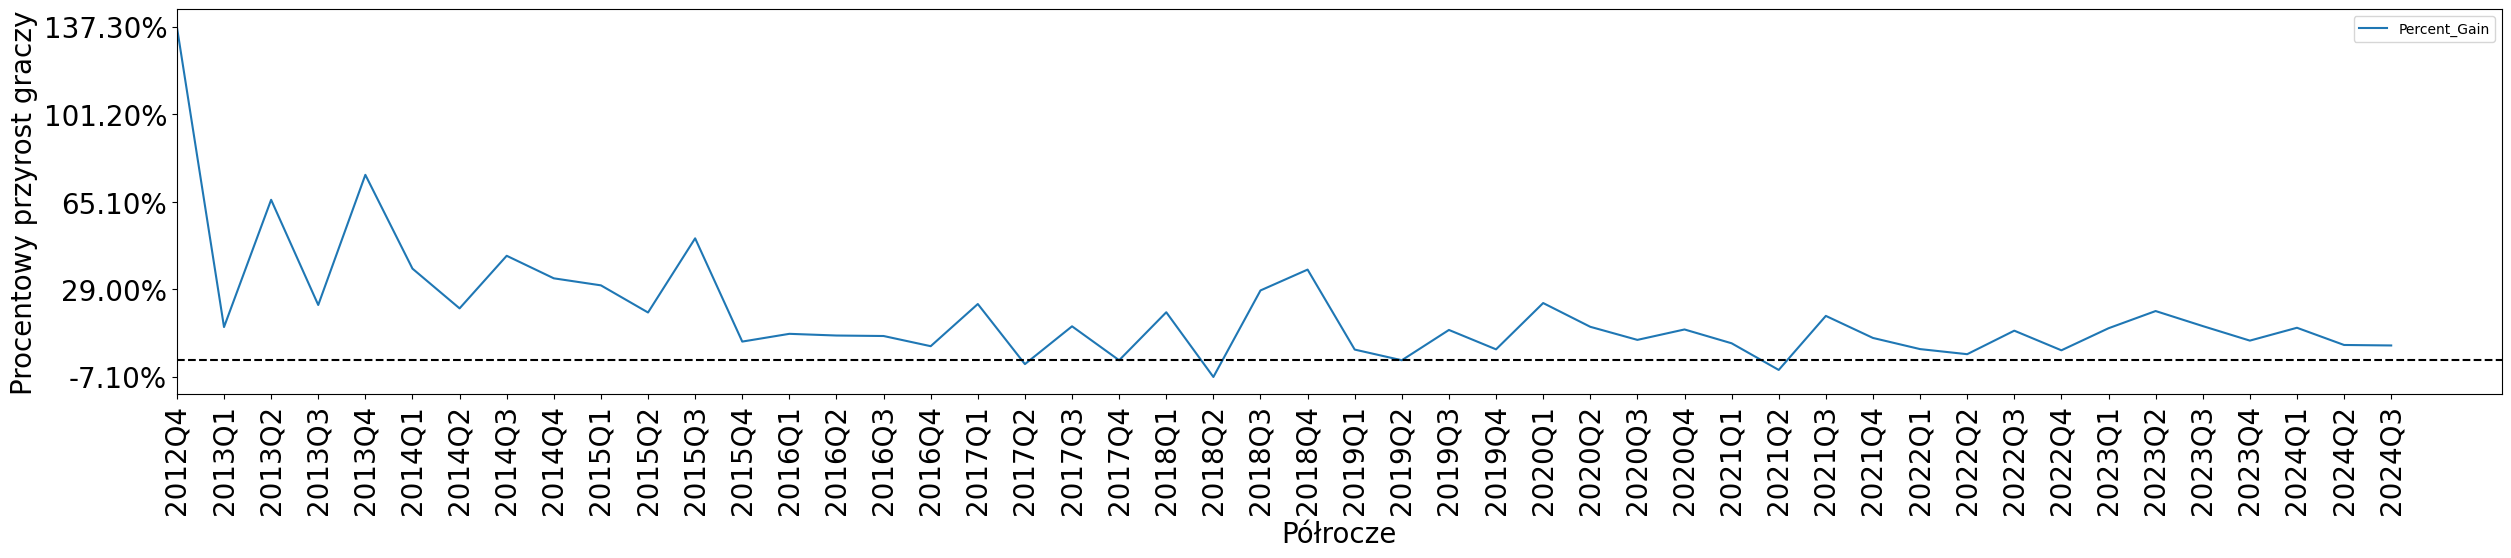

In [272]:
plt.figure(figsize=(30,5))
plt.xlabel('Półrocze', fontsize=20)  # Etykieta osi X
plt.ylabel('Procentowy przyrost graczy', fontsize=20)  # Etykieta osi Y
sns.lineplot( data=quarterly_data3)
y_min = quarterly_data3['Percent_Gain'].min()
y_max = quarterly_data3['Percent_Gain'].max()
yticks = np.linspace(y_min, y_max, 5)
plt.yticks(yticks)

plt.gca().get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(x, '.2f') + '%'))
plt.xticks(rotation=90, fontsize=20)  # Powiększ czcionkę dla osi X (wartość fontsize)
plt.xticks(np.arange(len(quarterly_data3)) +4, quarterly_data3['Quarter'], rotation=90)
plt.yticks(fontsize=20)  # Powiększ czcionkę dla osi Y

plt.xlim(left=4)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.show()
